<a href="https://colab.research.google.com/github/roscibely/Artificial-Intelligence-Course/blob/main/Deep_Learning_Overview_Experiment_Guide_Parte_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description



This experiment guide introduces the following four experiments:

- **Experiment 1**: TensorFlow basics
  - This experiment mainly describes the basic syntax of TensorFlow 2.
- **Experiment 2**: common modules of TensorFlow 2
  - This experiment mainly introduces Keras interfaces.
- **Experiment 3**: handwritten text recognition
  - This experiment uses basic code to help learners understand how to implement handwritten text recognition through TensorFlow 2.0.
- **Experiment 4**: Image Classification
  - This experiment is based on how to use TensorFlow 2 and python packages to predict image categories from CIFAR10 image classification dataset. It is hoped that trainees or readers can get started with deep learning and have the basic programming capability of implementing image recognition models.


# 3.0 Handwritten Digit Recognition with TensorFlow

## 3.1 Introduction

Handwritten digit recognition is a common image recognition task where computers recognize text in handwriting images. Different from printed fonts, handwriting of different people has different sizes and styles, making it difficult for computers to recognize handwriting.


This chapter describes the basic process of TensorFlow computing and basic elements for building a network.


## 3.2 Objectives

Upon completion of this task, you will be able to:

- Master the basic process of TensorFlow computing.
- Be familiar with the basic elements of network building, including dataset, network model building, model training, and model validation.


## 3.3 Experiment Steps

This experiment involves the following steps:

- Reading the MNIST handwritten digit dataset.
- Getting started with TensorFlow by using simple mathematical models.
- Implementing softmax regression by using high-level APIs.
- Building a multi-layer CNN.
- Implementing a CNN by using high-level APIs.
- Visualizing prediction results.


### 3.3.1 Project Description and Dataset Acquistion

#### 3.3.1.1 Description

This project applies deep learning and TensorFlow tools to train and build models based on the MNIST handwriting dataset.

#### 3.3.1.2 Data Acquisition and Processing


###### 3.3.1.2.1 About the Dataset

The MNIST dataset is provided by the National Institute of Standards and Technology (NIST).

The dataset consists of handwritten digits from 250 individuals, of which 50% are high school students and 50% are staff from Bureau of the Census.

You can download the dataset from http://yann.lecun.com/exdb/mnist/, which consists of the following parts:
- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB after decompression, including 60,000 samples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB after decompression, including 60,000 labels)
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB after decompression, including 10,000 samples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB after decompression, including 10,000 labels).

The MNIST dataset is an entry-level computer vision dataset that contains images of various handwritten digits.


<center><img width="400" src="https://drive.google.com/uc?export=view&id=16KpkD34ULrfb0tEY-OP5d6Viay4WSKQm"></center>

It also contains one label for each image, to clarify the correct digit. For example, the labels for the preceding four images are 5, 0, 4, and 1.



##### 3.3.1.2.2 MNIST Dataset Reading

Download the MNIST dataset directly from the official TensorFlow website and decompress it.

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np
 
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data() 
 
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
 
#Convert the labels into one-hot codes.
num_classes = 10

y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

print(y_train[0])

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In the MNIST dataset, the images are a tensor in the shape of [60000, 28, 28]. The first dimension is used to extract images, and the second and third dimensions are used to extract pixels in each image. Each element in this tensor indicates the strength of a pixel in an image. The value ranges from **0** to **255**.


Label data is one-hot vectors. In a one-hot vector, one digit is 1, and digits in other dimensions are all 0s. For example, label 1 may be represented as [0,1,0,0,0,0,0,0,0,0,0,0]. Therefore, the labels are a digital matrix of [60000, 10].


### 3.3.2 Dataset Preprocessing and Visualization

#### 3.3.2.1 Data Visualization

Draw the first nine images.

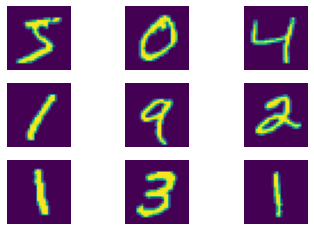

In [ ]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    #plt.ylabel(y[i].numpy())
    plt.axis('off')
plt.show()

#### 3.3.2.2 Data Preprocessing

An output of a fully connected network must be in the form of vector, instead of the matrix form of the current images. Therefore, you need to sort the images into vectors.

In [ ]:
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

### 3.3.3 DNN Construction

#### 3.3.3.1 Building a DNN Model

In [ ]:
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
model = keras.Sequential([ 
    layers.Dense(512, activation='relu', input_dim = 784),
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


**layer.Dense()** indicates a fully connected layer, and activation indicates a used activation function.

#### 3.3.3.2 Compiling the DNN Model

In [ ]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])

In the preceding example, the loss function of the model is cross entropy, and the optimization algorithm is the **Adam** gradient descent method.

#### 3.3.3.3 Training the DNN Model

In [ ]:
#Fit the training data to the model by using the fit method.
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 1.4973 - accuracy: 0.8928
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1930 - accuracy: 0.9531
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1167 - accuracy: 0.9668
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0959 - accuracy: 0.9732
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0838 - accuracy: 0.9754
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0749 - accuracy: 0.9786
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0839 - accuracy: 0.9774
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0686 - accuracy: 0.9802
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0784 - accuracy: 0.9785
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0628 - accura

**Epoch** indicates a specific round of training. In the preceding example, full data is iterated for 10 times.

#### 3.3.3.4 Evaluating the DNN Model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15934695303440094
Test accuracy: 0.9686999917030334


The evaluation shows that the model accuracy reaches 0.87, and 10 training iterations have been performed.

#### 3.3.3.5 Saving the DNN Model

In [ ]:
model.save('final_DNN_model.h5')

### 3.3.4 CNN Construction

The conventional CNN construction method helps you better understand the internal network structure but has a large code volume. Therefore, attempts to construct a CNN by using high-level APIs are made to simplify the network construction process.

#### 3.3.4.1 Building a CNN Model


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
 
model=keras.Sequential() #Create a network sequence.
##Add the first convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
##Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

In the preceding network, two convolutional layers and two pooling layers are first added by using **keras.layers**. Afterwards, a dropout layer is added to prevent overfitting. Finally, two fully connected layers are added.


#### 3.3.4.2 Compiling and Training the CNN Model


In [ ]:
#Expand data dimensions to adapt to the CNN model.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy']) 
model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 71s 151ms/step - loss: 0.8464 - accuracy: 0.8162
Epoch 2/5
469/469 [==============================] - 70s 150ms/step - loss: 0.1823 - accuracy: 0.9460
Epoch 3/5
469/469 [==============================] - 70s 149ms/step - loss: 0.1327 - accuracy: 0.9618
Epoch 4/5
469/469 [==============================] - 70s 150ms/step - loss: 0.1045 - accuracy: 0.9694
Epoch 5/5
469/469 [==============================] - 70s 150ms/step - loss: 0.0932 - accuracy: 0.9738


During training, the network training data is iterated for only five times. You can increase the number of network iterations to check the effect.

#### 3.3.4.3 Evaluating the CNN Model

In [ ]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0431 - accuracy: 0.9872
Test Accuracy 0.99


The verification shows that accuracy of the CNN model reaches up to 99%.

#### 3.3.4.4 Saving the CNN Model

In [ ]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0431 - accuracy: 0.9872
Test Accuracy 0.99


In [ ]:
model.save('final_CNN_model.h5')

### 3.3.5 Prediction Result Visualization

#### 3.3.5.1 Loading the CNN Model

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('final_CNN_model.h5')
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)              

Visualize prediction results.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction results of the first 20 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
first 20 images in the test set:


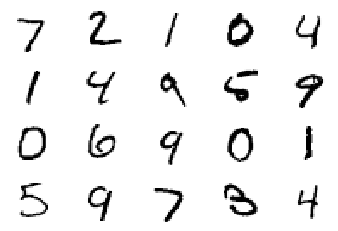

In [ ]:
#Visualize test set output results.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    final_opt_a=new_model.predict_classes(X_test[0:n])#Perform predictions on the test set by using the model.
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('prediction results of the first {} images:'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize image display.
        img = X_test[i].reshape((28,28))#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualization
        ax[i].axis("off")
    print('first {} images in the test set:'.format(n))
res_Visual(20)
